In [1]:
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="improvement",
    encodings=["target", "one_hot"],
    learners=["xgb", "lr", "rf", "mlp"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo", "rs"],
    criteria=["f1", "brier_score"],
    sampling=[None],
    factor=None,
    n_configs=50,
    n_jobs=-1,
    threshold_tuning=False,
    path="/Users/toby/periodontal-modeling/data/processed/processed_data.csv"
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,Brier Skill Score,ROC AUC Score,Confusion Matrix
0,Dummy Classifier,target,0.0000,0.0000,0.0000,0.7125,0.2049,NaN,0.5000,"[[0, 1095], [0, 2714]]"
1,Logistic Regression,target,0.0717,0.5455,0.0384,0.7144,0.1960,0.0432,0.6306,"[[42, 1053], [35, 2679]]"
2,Random Forest,target,0.0955,0.4214,0.0539,0.7067,0.1983,-0.0117,0.6195,"[[59, 1036], [81, 2633]]"
3,Dummy Classifier,one_hot,0.0000,0.0000,0.0000,0.7125,0.2049,NaN,0.5000,"[[0, 1095], [0, 2714]]"
4,Logistic Regression,one_hot,0.1750,0.5251,0.1050,0.7154,0.1950,0.0480,0.6421,"[[115, 980], [104, 2610]]"
5,Random Forest,one_hot,0.1465,0.4444,0.0877,0.7062,0.2004,-0.0276,0.6113,"[[96, 999], [120, 2594]]"


In [ ]:
benchmark, learners = wrapper.wrapped_benchmark()
wrapper.save_benchmark(
    benchmark_df=benchmark,
    path="reports/improvement/improvement_experiments.csv",
)
wrapper.save_learners(learners_dict=learners, path="models/improvement_experiments")

In [ ]:
from periomod.wrapper import load_benchmark, load_learners

benchmark = load_benchmark(
    path="/Users/toby/periodontal-modeling/reports/improvement/improvement_experiments.csv",
    )
learners = load_learners(
    path="/Users/toby/periodontal-modeling/models/improvement_experiments"
    )

In [8]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
    path="/Users/toby/periodontal-modeling/data/processed/processed_data.csv"
)

In [9]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,improvement,rf,f1,None,None,0.4555,0.345,0.6726,0.5556,0.2377,0.6226,0.5,"[[749, 367], [1421, 1486]]"


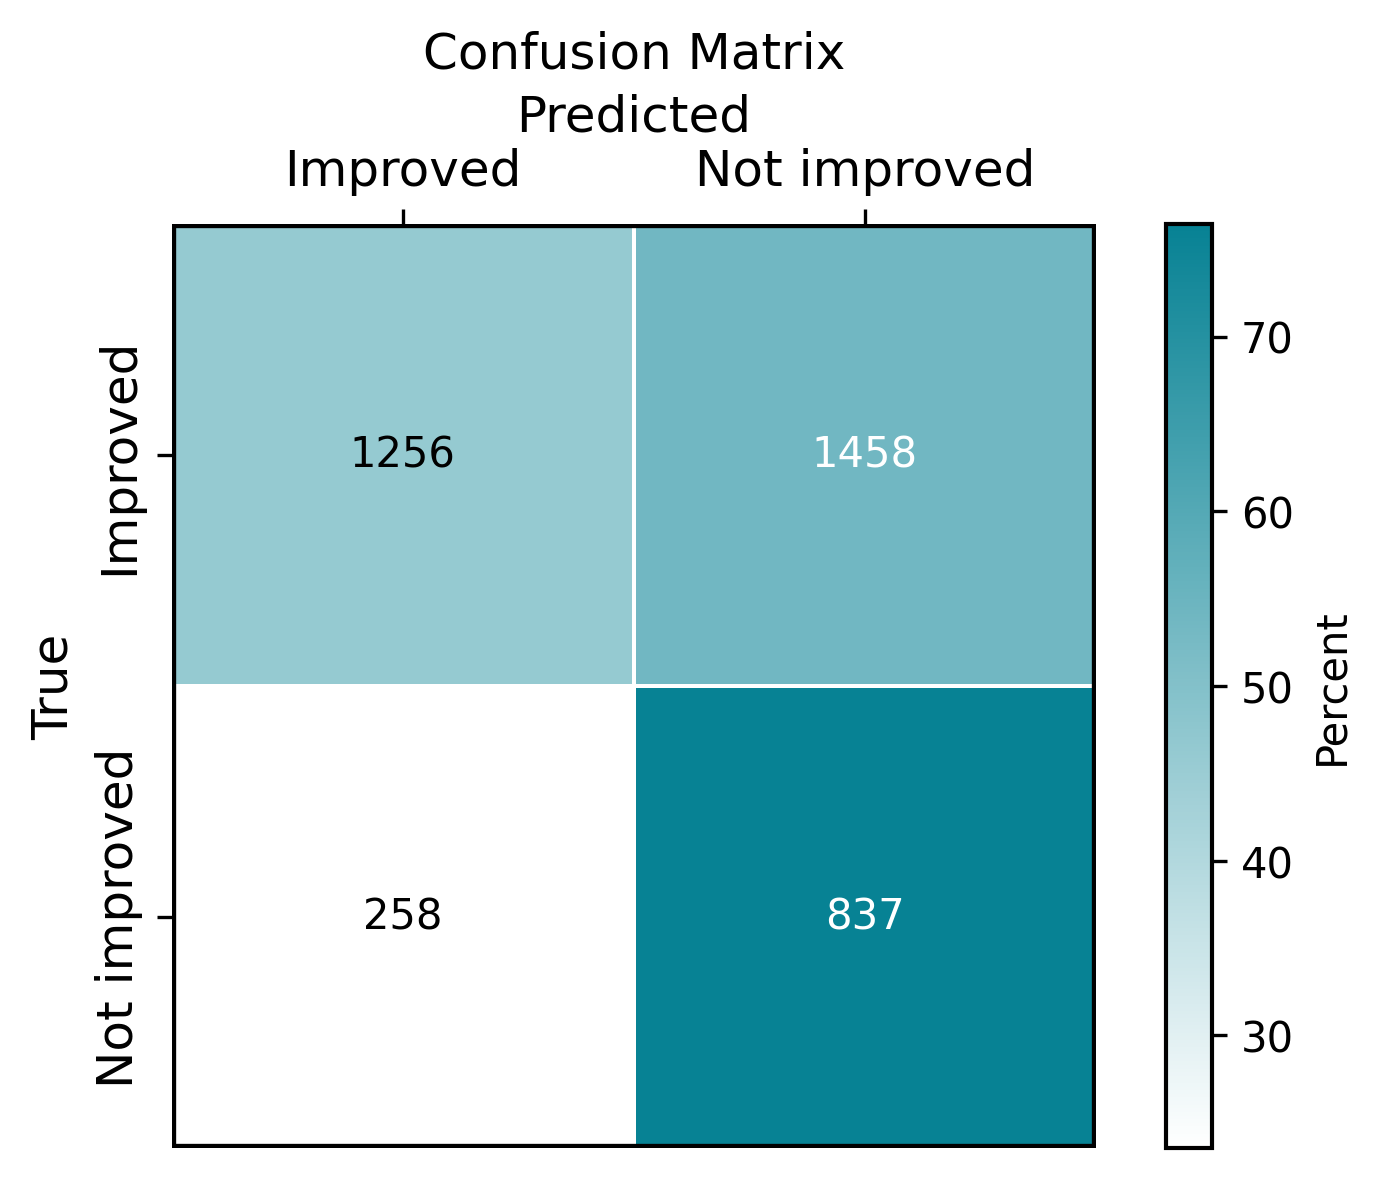

Average and Median Brier Scores by y:
              y      mean    median
0      Improved  0.242343  0.257718
1  Not improved  0.231160  0.198042


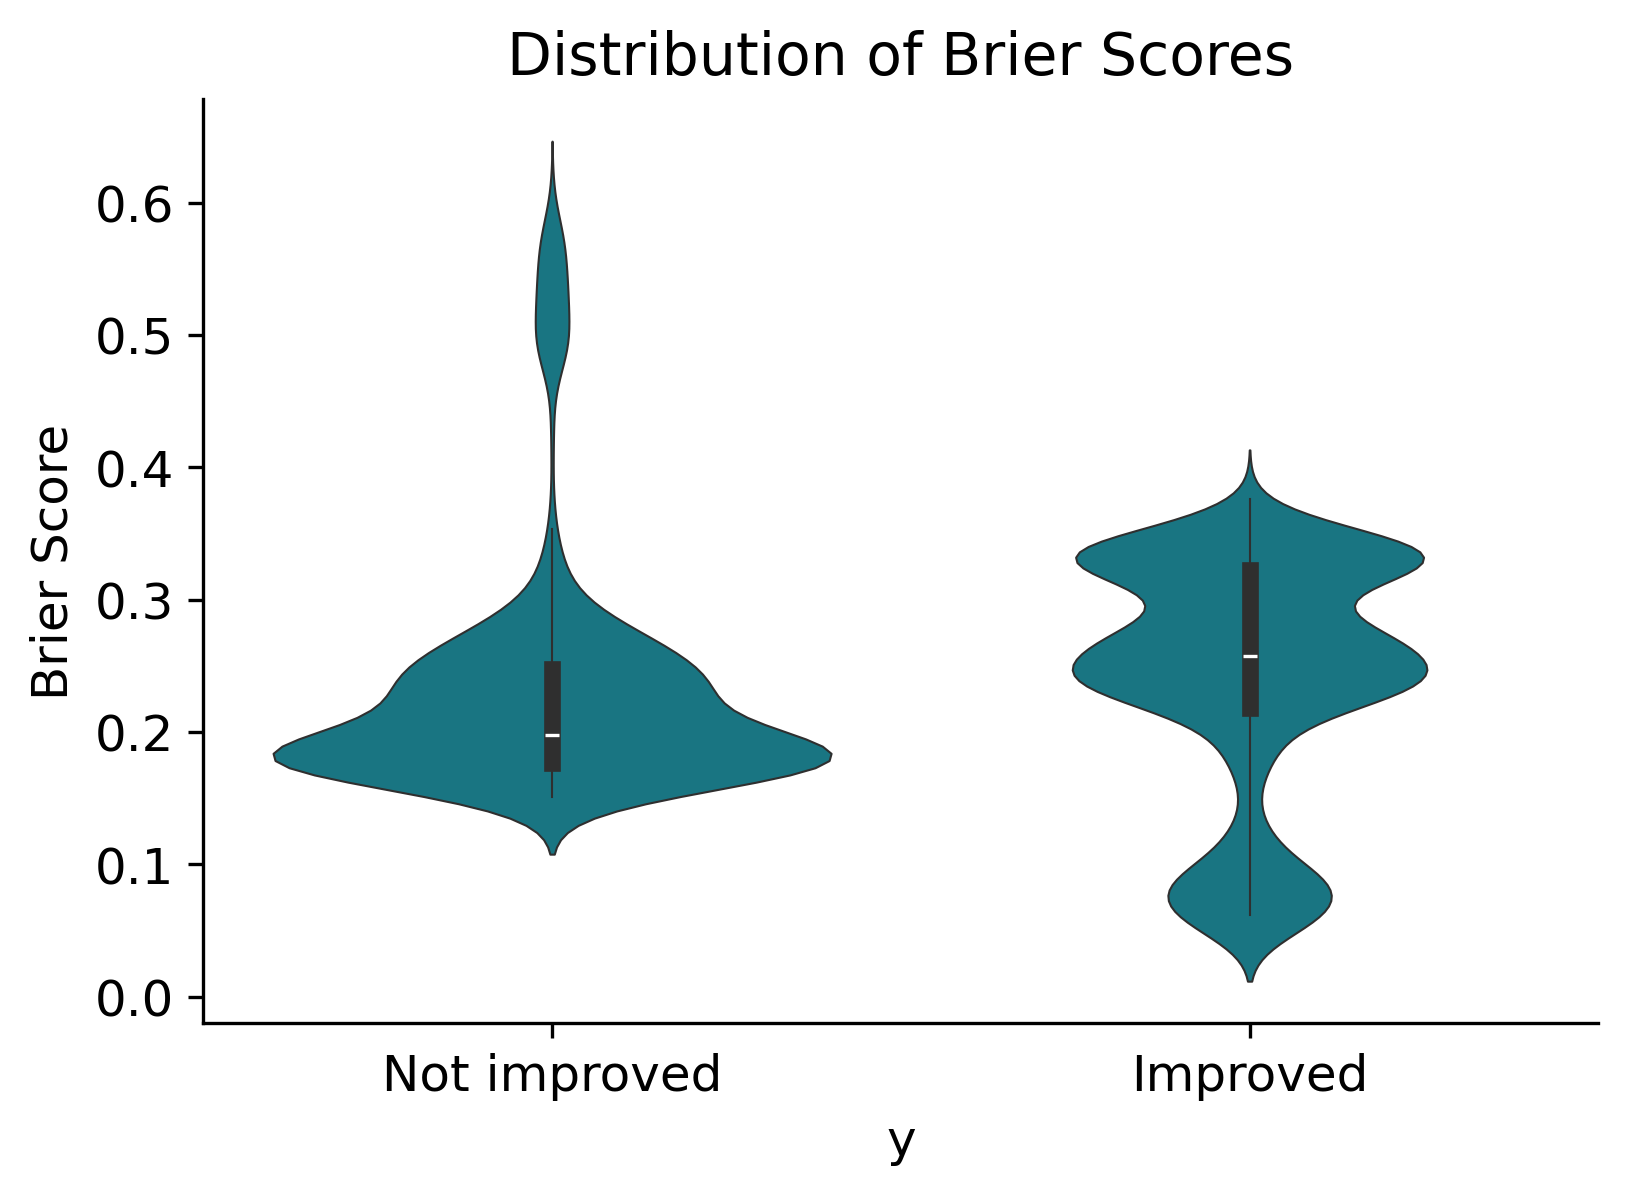

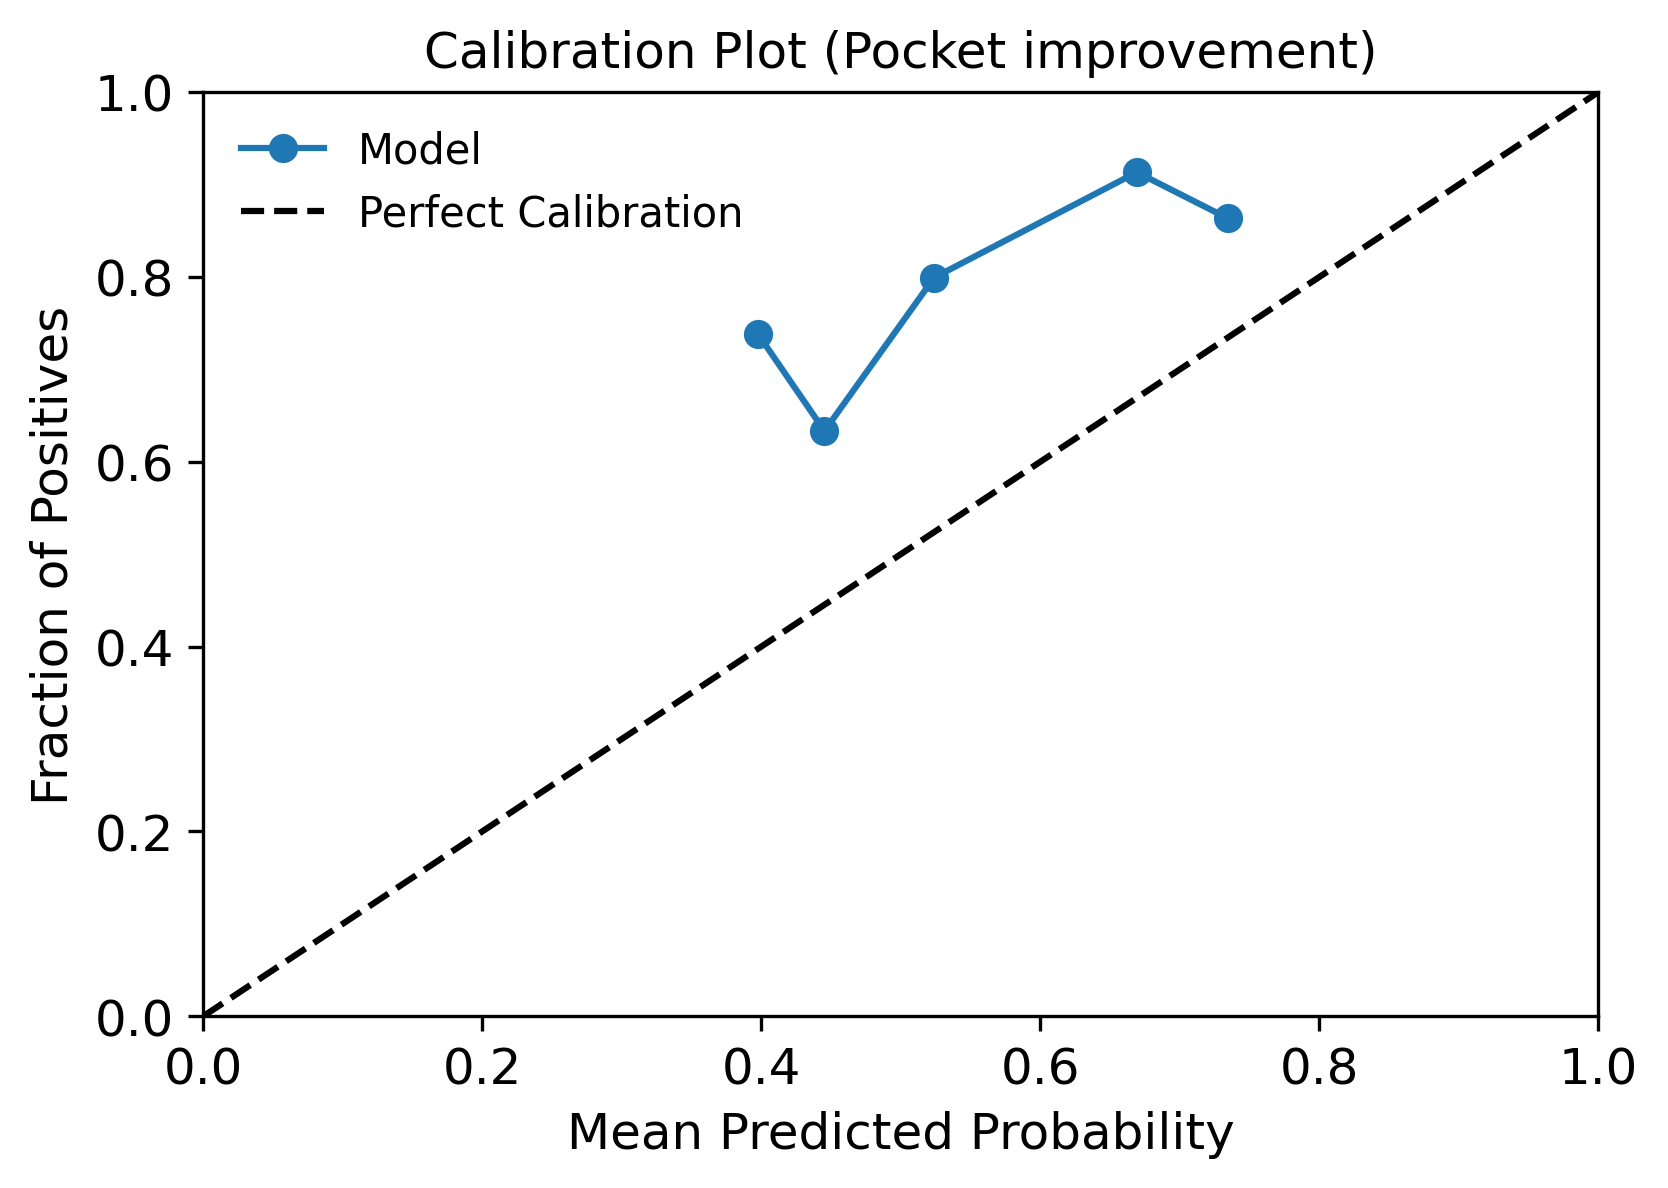

In [10]:
evaluator.wrapped_evaluation()

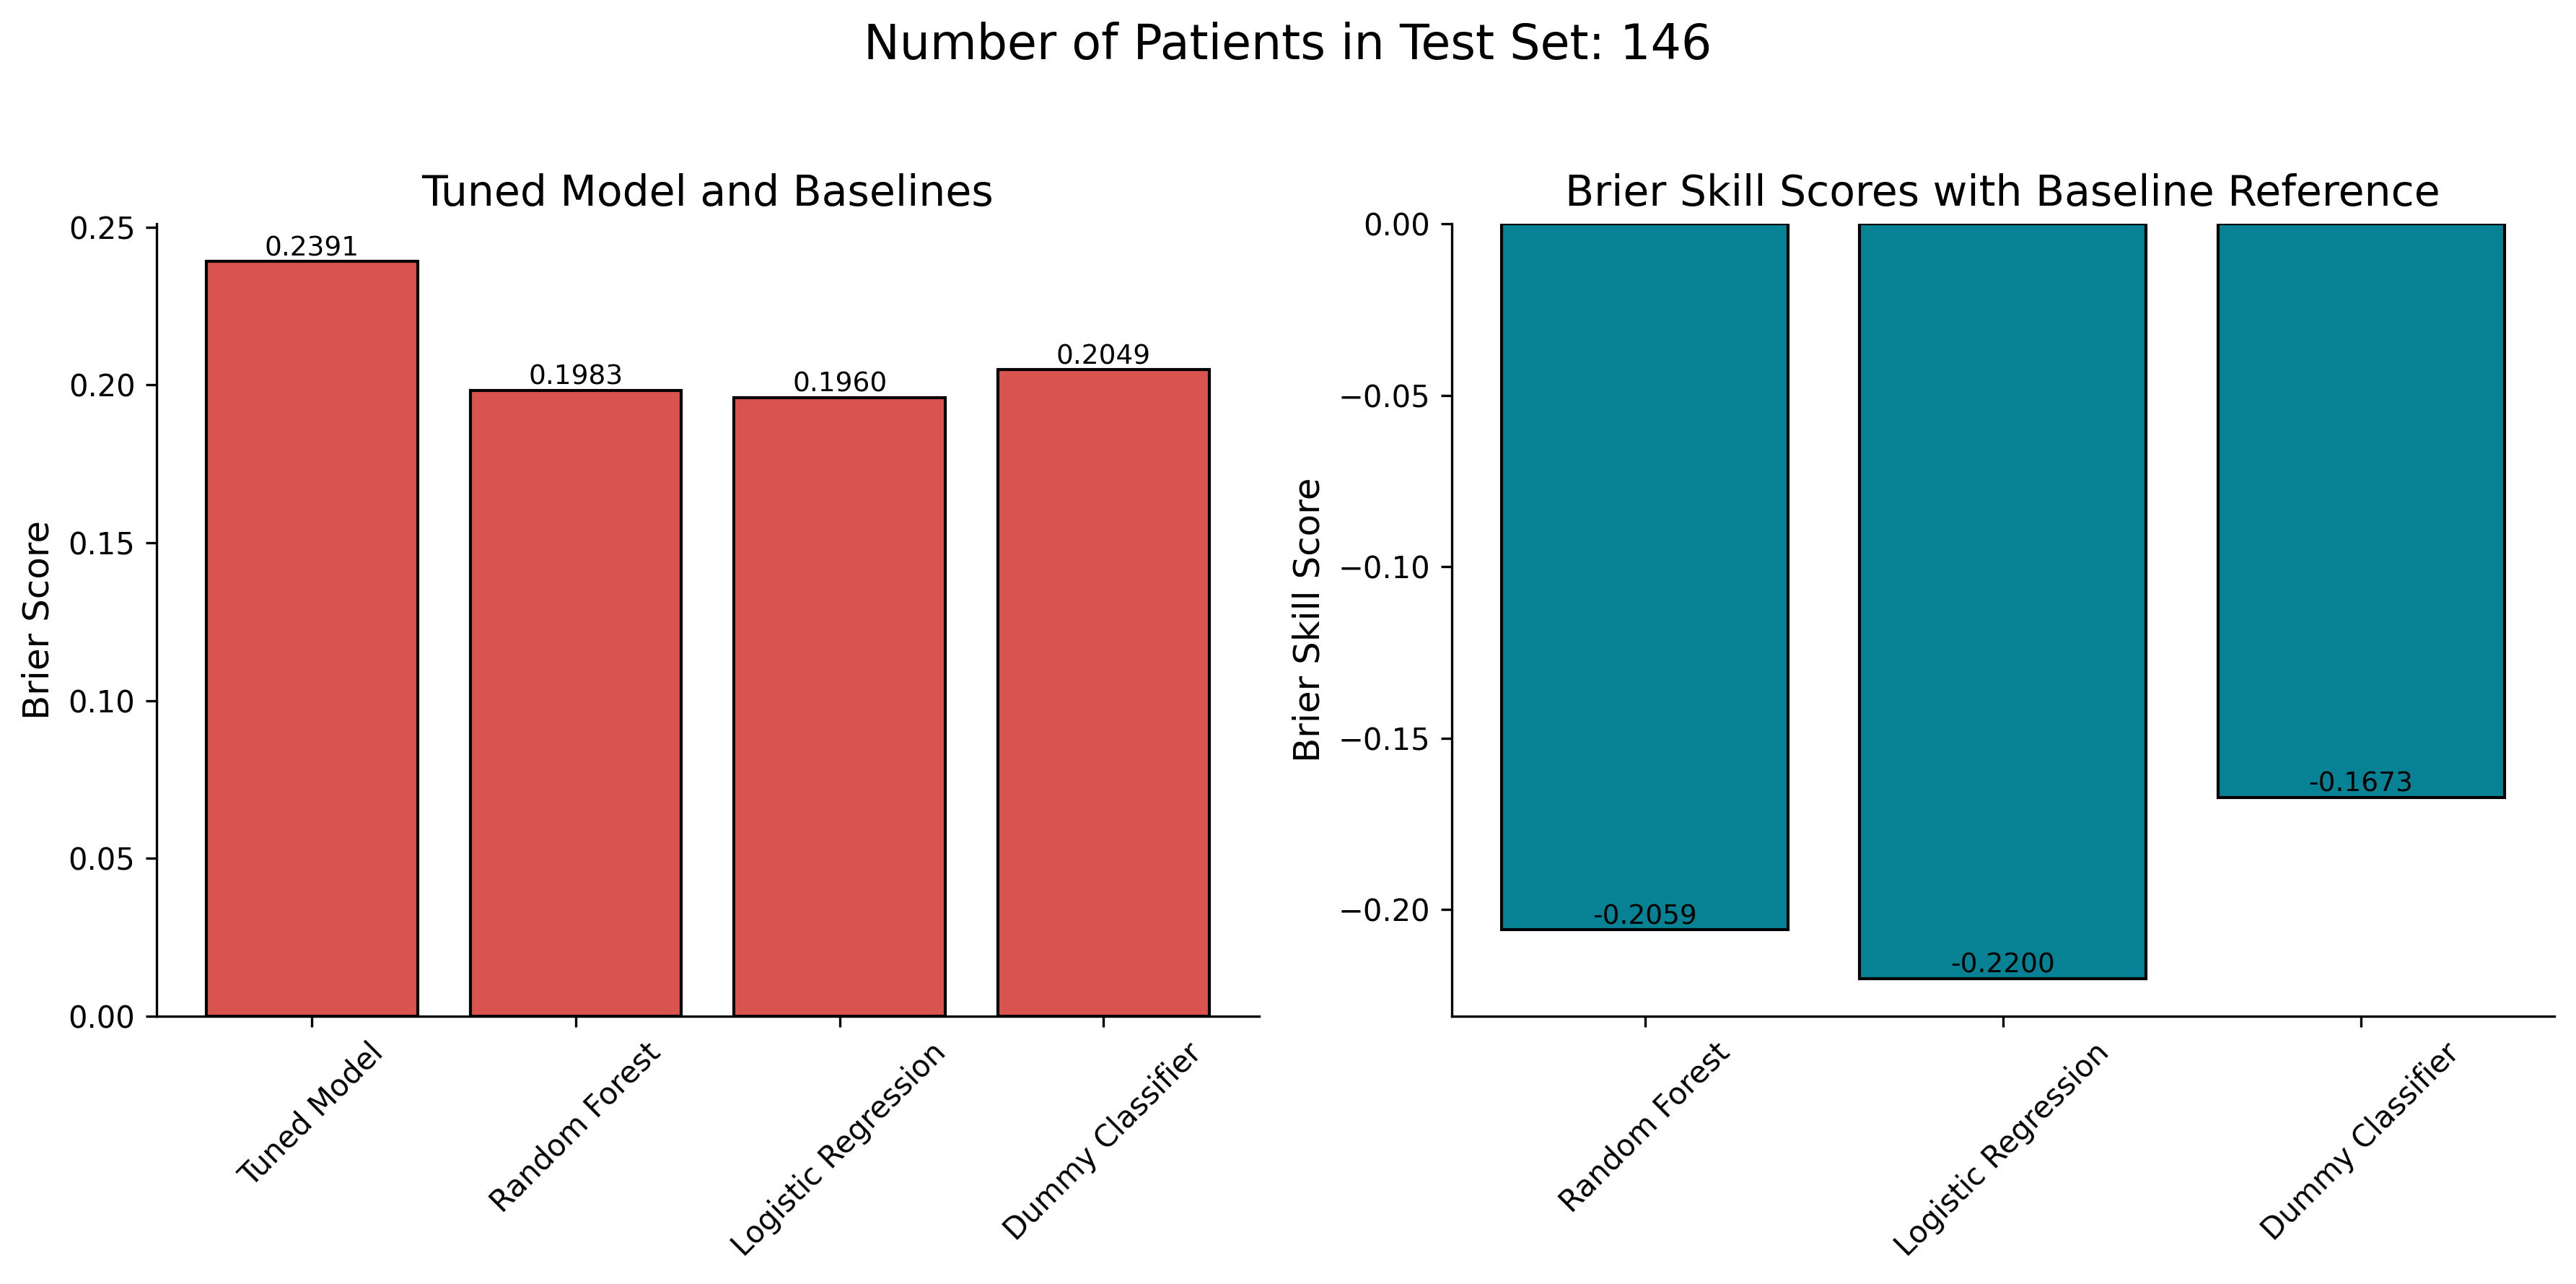

In [11]:
evaluator.compare_bss(tight_layout=True)

Number of patients in test set: 146

Mean Brier Score per cluster:
 Cluster
0    0.237600
1    0.279288
2    0.224068
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    2762
1     362
2     685
Name: count, dtype: int64


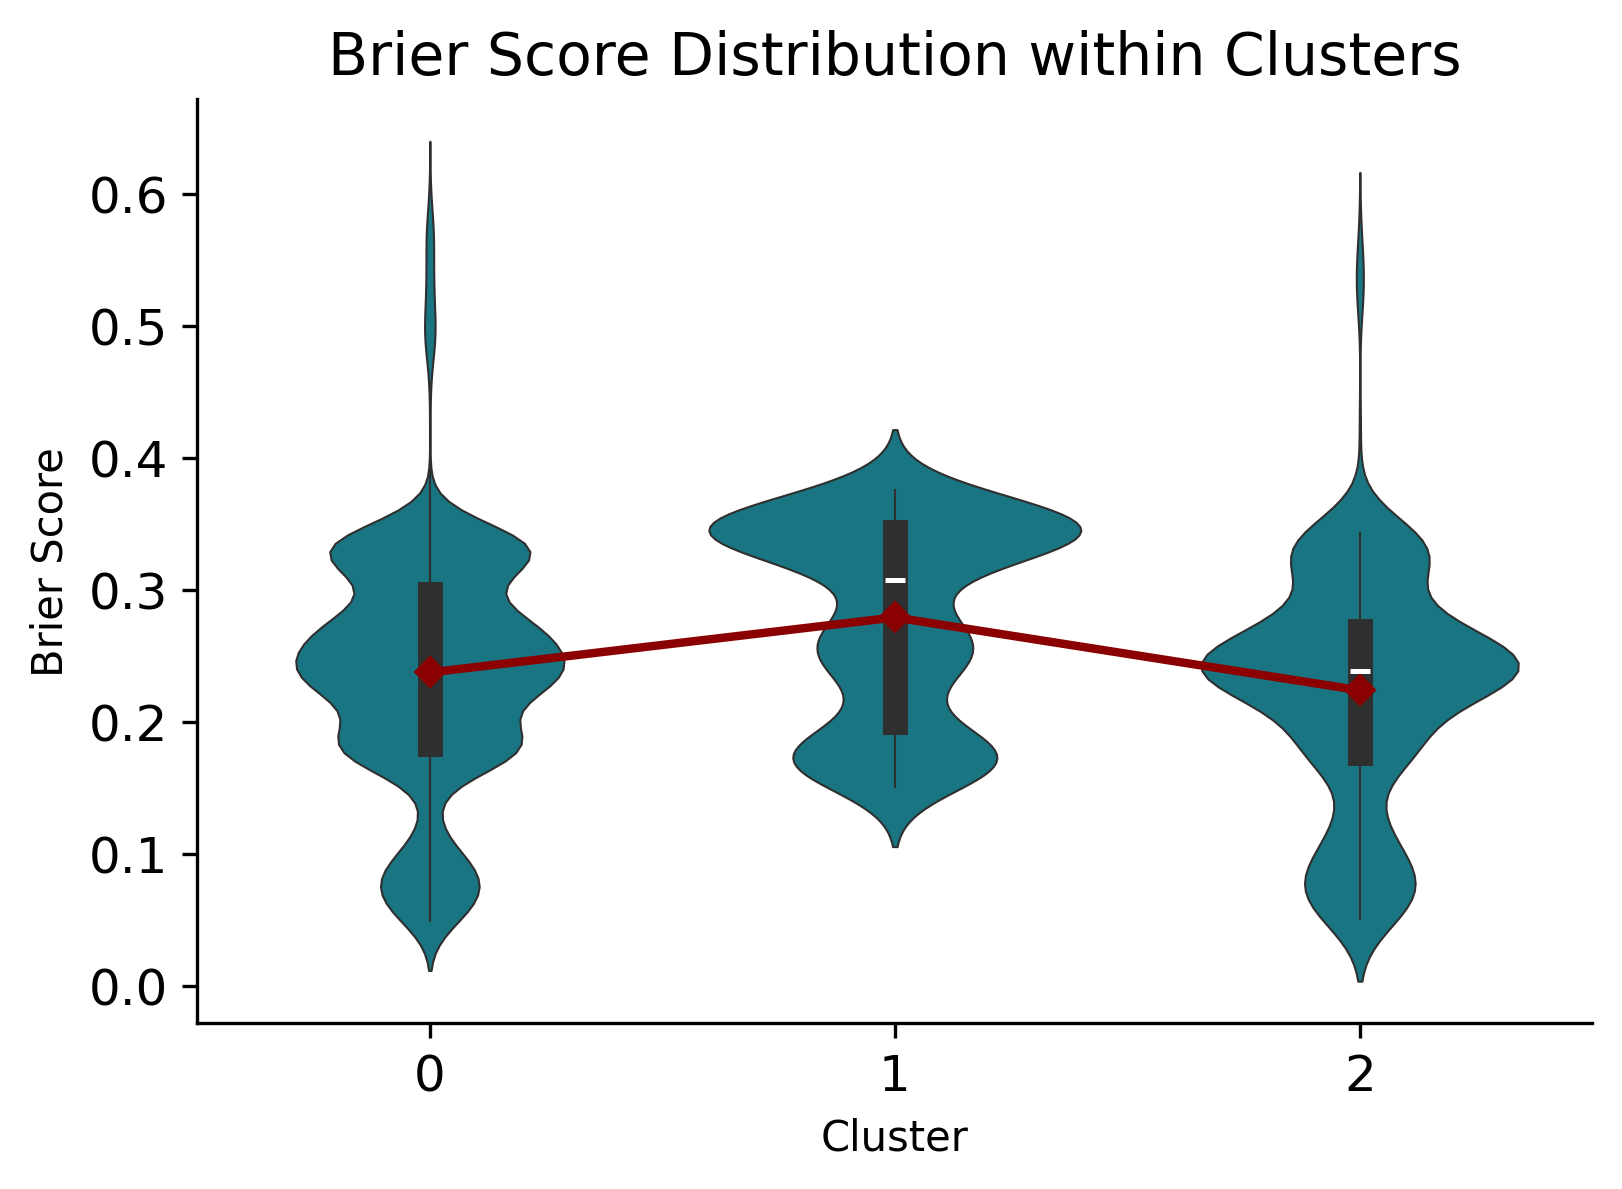

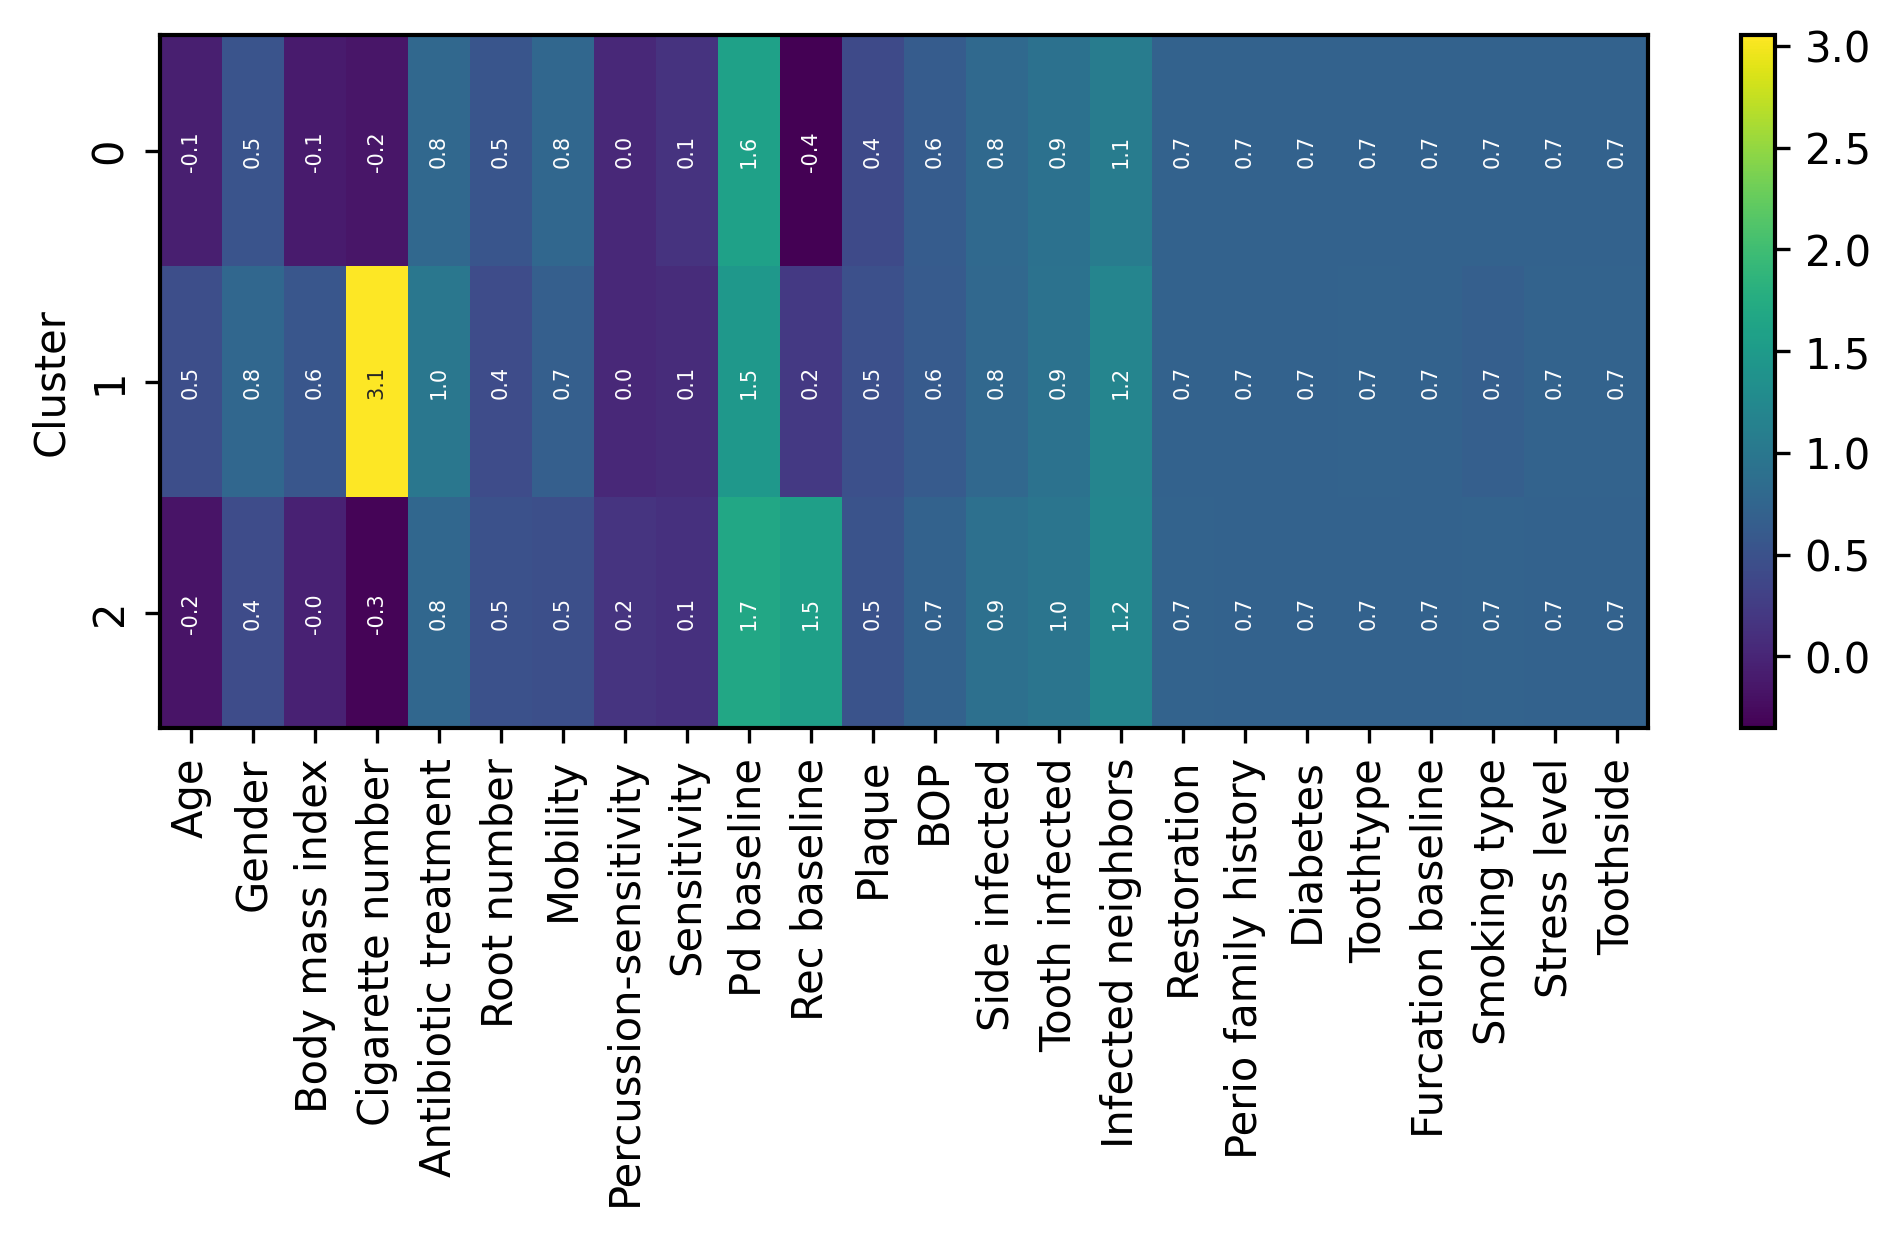

In [12]:
evaluator.evaluate_cluster()

Number of patients in test set: 146


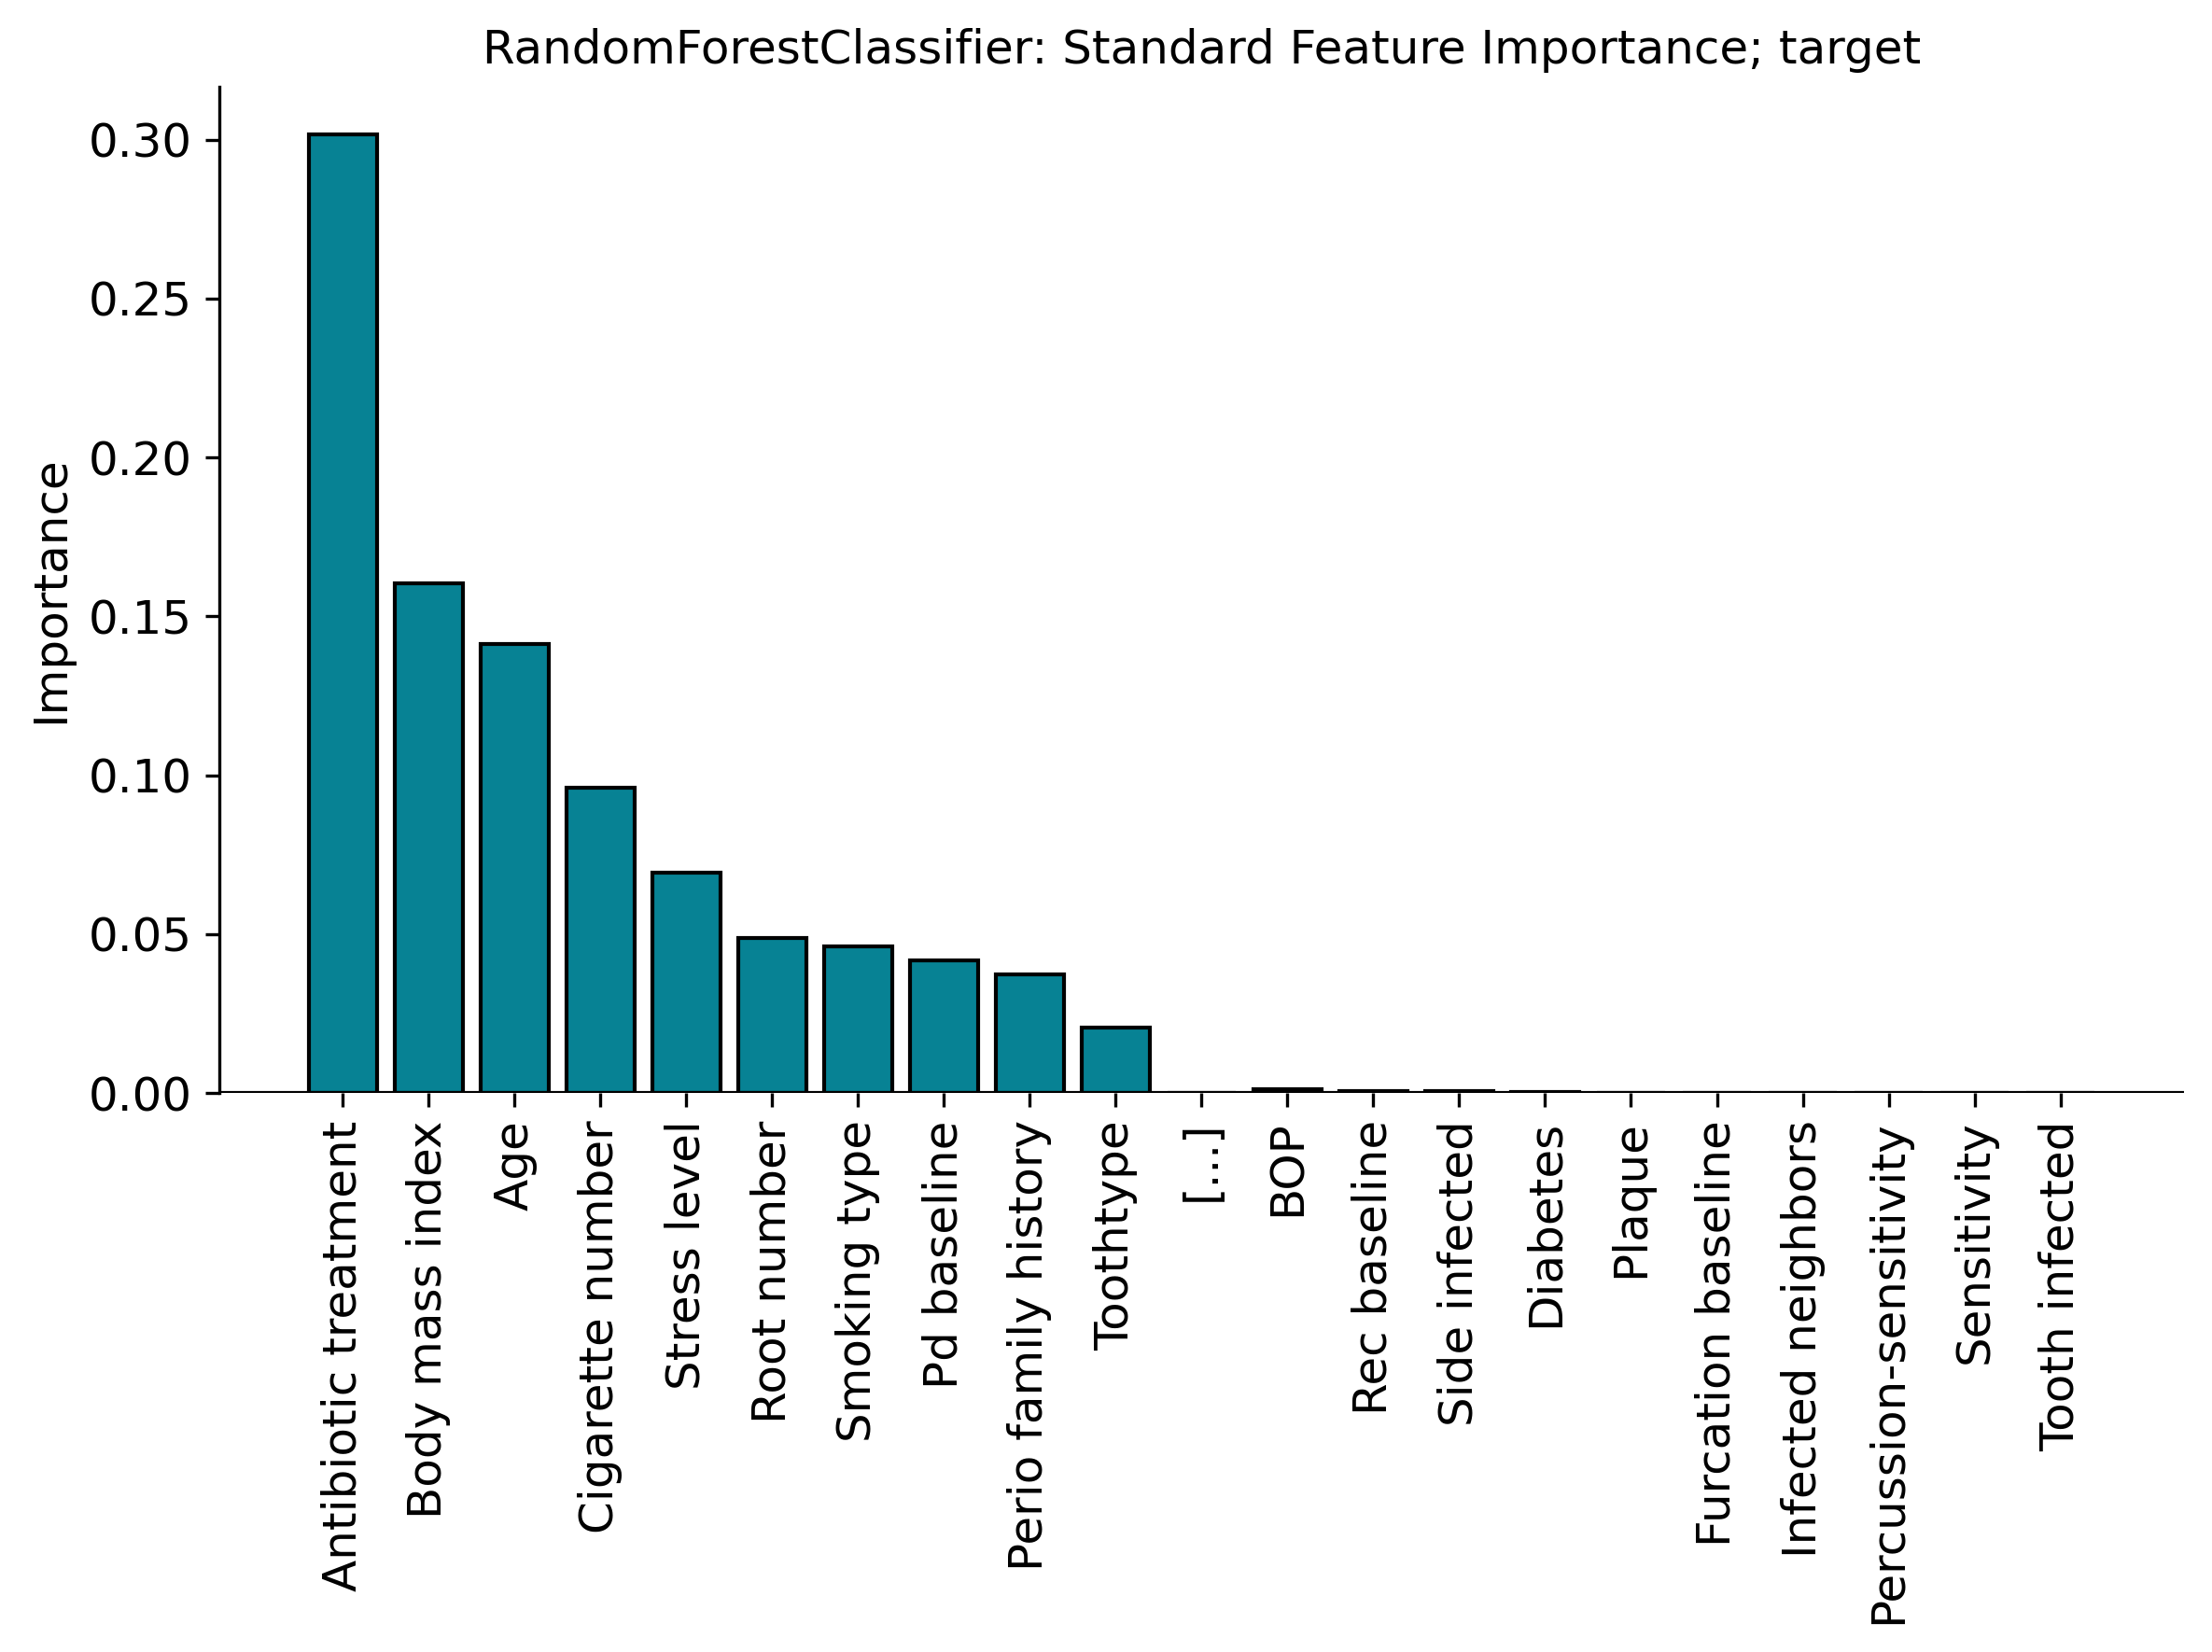

In [13]:
evaluator.evaluate_feature_importance(fi_types=["standard"])